In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Ejemplo 2 - Sistemas de segundo orden

Se realizó el montaje de la simulación de un filtro de segundo orden y se capturaron los datos de salida. Se debe realizar el proceso de identificación y obtención de la función de transferencia a partir del método de análisis de la curva de reacción.

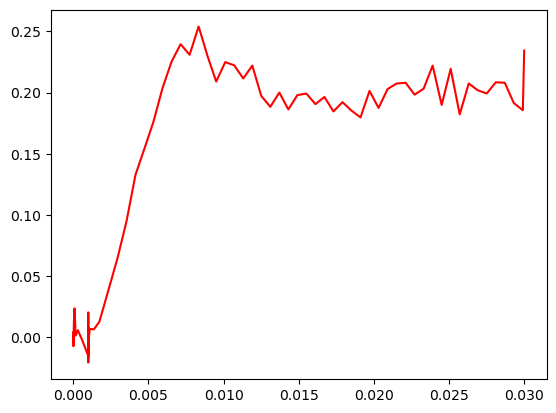

In [3]:
## Se cargan los datos que están en un archivo separado por comas.
## Se obtuvieron de una simulación en MULTISIM de un filtro paso bajos de orden 2 (como el de la tarea)
datos = pd.read_csv('data\low2.csv')

y = datos.y;
u = datos.u;
t = datos.t1;
N = len(y);

## Como es una simulación de un circuito la señal no contiene ruido, por tanto la contaminamos.
r = 0.01
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')

## Experimento de identificación

**Paso 1:** Determinar el porcentaje de sobrepaso para para calcular el índice de amortiguamiento del sistema. En este caso se debe "observar" el valor final de establecimiento del sistema.

In [21]:
## El porcentaje de sobrepaso (overshot) y el tiempo del pico

## Valor observado de la gráfica de la respuesta.
Kf = 0.2
############

###### Valor máximo alcanzado por la respuesta y Valor del sobrepaso
Kmax = np.max(yn)
os = ((Kmax - Kf)/Kf)
############

## Calculando el tiempo de pico
for i in range(len(yn)):
    if(yn[i]==Kmax):
        tp = t[i]
        break
tp

**Paso 2:** Calcular el valor aproximado de zeta ($\zeta$) para el sistema.

In [22]:
## Determinando el índice de amortiguamiento
pi = math.pi
ze = -math.log(os)/math.sqrt(pi*pi+math.log(os)*math.log(os))
ze

**Paso 3:** Calculando la frecuencia natural del sistema

In [23]:
## Determinando el valor de wn a partir del tp y de zeta
we = pi/(tp*math.sqrt(1-ze*ze))
we

In [24]:
## Calculando el tiempo de establecimiento y 
ts = 4/(ze*we)
ts

In [25]:
## determinando el valor aproximado del valor final
## Calculando el valor final utilizando el tiempo de establecimiento
Kf = 0
i2 = 0;

for j in range(N):
    if(t[j]>ts):
        Kf = Kf+yn[j]
        i2 = i2+1

Kf = Kf/i2
print(Kf)

0.20168211118186044


**Paso 4:** Armando la función de transferencia de segundo orden.

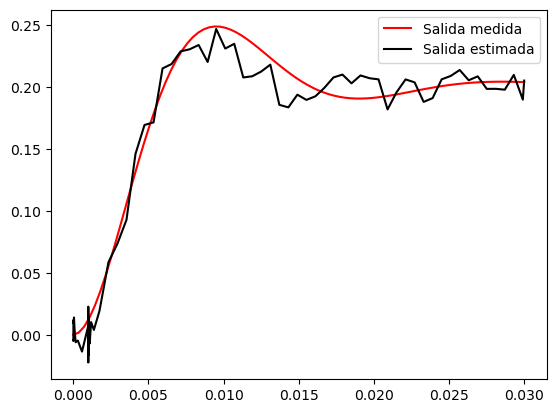

In [26]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf*we*we],[1,2*ze*we,we*we])

## Calculando vector tiempo para la estimación
tf = 0.03
te = np.linspace(0,tf,N)

## Calculando la respuesta al escalón
_,ye = control.step_response(ge,te)
plt.plot(te,ye,color = 'red')
plt.plot(t,yn,color = 'black')
plt.legend(['Salida medida','Salida estimada'])
#e = yn - ye
#plt.plot(t,e,color = 'blue')


In [27]:
## Función de transferencia estimada o identificada
ge

TransferFunction(array([26708.90504804]), array([1.00000000e+00, 3.05388438e+02, 1.32430709e+05]))